<a href="https://colab.research.google.com/github/tpessoa-dev/plataformas-cognitivas/blob/main/ML_com_GCP_01_An%C3%A1lise_de_dados_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autenticação
Primeiro precisamos autenticar nossa sessão do Colab no Google e definimos o ID do projeto

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [4]:
#Informe o id do projeto nesta linha. Este é meu ID, você precisa colocar o teu:

project_id = "plataformas-cognitivas-323200" #@param {type:"string"}


# Client Big Query

Como vamos buscar dados no bigquery, é necessário criar um cliente BG

In [5]:
# Call BigQuery and examine in dataframe
from google.cloud import bigquery

bgclient = bigquery.Client(project=project_id)

Demais imports:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#Exploração



Vamos avaliar quantas observações realmente temos, e quanta temos a partir de 2001

In [8]:
query = """
SELECT
  COUNT(1) as observacoes
FROM
  publicdata.samples.natality
"""
df = bgclient.query(query).to_dataframe()
df

,observacoes
0,137826763


In [9]:
query = """
SELECT
  COUNT(1) as observacoes
FROM
  publicdata.samples.natality
WHERE year > 2000
"""
df = bgclient.query(query).to_dataframe()
df

,observacoes
0,33271914


In [14]:
query = """
SELECT
is_male,
COUNT(1) AS qtde_bebes,
AVG( weight_pounds ) AS avg_pound,
AVG( weight_pounds * 0.45359237 ) AS avg_kg
FROM
publicdata.samples.natality
WHERE
year > 2000
GROUP BY
is_male
ORDER BY 1
"""
df = bgclient.query(query).to_dataframe()
df

,is_male,qtde_bebes,avg_pound,avg_kg
0,False,16245054,7.104715,3.222645
1,True,17026860,7.349797,3.333812


In [15]:
query = """
SELECT
mother_age,
COUNT(1) AS qtde_bebes,
AVG( weight_pounds ) AS avg_pound,
AVG( weight_pounds * 0.45359237 ) AS avg_kg
FROM
publicdata.samples.natality
WHERE
year > 2000
GROUP BY
mother_age
ORDER BY 1
"""
df = bgclient.query(query).to_dataframe()
df

,mother_age,qtde_bebes,avg_pound,avg_kg
0,10,3,7.533195,3.417000
1,11,44,6.149945,2.789568
2,12,1196,6.506330,2.951221
3,13,7552,6.656063,3.019139
4,14,44868,6.743684,3.058883
5,15,147763,6.840995,3.103023
6,16,341199,6.896279,3.128100
7,17,613485,6.942952,3.149270
8,18,973333,6.973427,3.163093
9,19,1359770,7.025968,3.186925


In [16]:
query = """
SELECT
plurality,
COUNT(1) AS qtde_bebes,
AVG( weight_pounds ) AS avg_pound,
AVG( weight_pounds * 0.45359237 ) AS avg_kg
FROM
publicdata.samples.natality
WHERE
year > 2000
GROUP BY
plurality
ORDER BY 1
"""
df = bgclient.query(query).to_dataframe()
df

,plurality,qtde_bebes,avg_pound,avg_kg
0,1,32159762,7.304663,3.313340
1,2,1056305,5.144866,2.333672
2,3,51913,3.688442,1.673049
3,4,3337,2.848459,1.292039
4,5,597,2.515053,1.140809


In [17]:
query = """
SELECT
gestation_weeks,
COUNT(1) AS qtde_bebes,
AVG( weight_pounds ) AS avg_pound,
AVG( weight_pounds * 0.45359237 ) AS avg_kg
FROM
publicdata.samples.natality
WHERE
year > 2000
GROUP BY
gestation_weeks
ORDER BY 1
"""
df = bgclient.query(query).to_dataframe()
df

,gestation_weeks,qtde_bebes,avg_pound,avg_kg
0,NaN,236089,7.134313,3.236070
1,17.0,2336,0.978025,0.443625
2,18.0,3905,0.884395,0.401155
3,19.0,6278,0.810890,0.367813
4,20.0,10847,1.001574,0.454306
5,21.0,14682,1.111511,0.504173
6,22.0,18855,1.235467,0.560398
7,23.0,24340,1.387928,0.629554
8,24.0,33449,1.796672,0.814957
9,25.0,38144,2.041015,0.925789


In [18]:
query = """
SELECT
mother_married,
COUNT(1) AS qtde_bebes,
AVG( weight_pounds ) AS avg_pound,
AVG( weight_pounds * 0.45359237 ) AS avg_kg
FROM
publicdata.samples.natality
WHERE
year > 2000
GROUP BY
mother_married
ORDER BY 1
"""
df = bgclient.query(query).to_dataframe()
df

,mother_married,qtde_bebes,avg_pound,avg_kg
0,False,12225150,7.037844,3.192312
1,True,21046764,7.341788,3.330179


Então iniciamos a exploração detalhada. Vamos buscar apenas 1000 observações dos nascimentos a partir de 2001:

In [10]:
query = """
SELECT
  weight_pounds,
  weight_pounds * 0.45359237 AS weight_kilos,
  is_male,
  mother_age,
  mother_married,
  plurality,
  gestation_weeks,
  CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)) as year_and_month,
  FARM_FINGERPRINT('ELTHON') AS MeuHash,  
  ABS(FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)))) AS hashmonth,
  RAND() AS meurand
FROM
  publicdata.samples.natality
WHERE year > 2000
LIMIT 1000
"""

In [11]:
df = bgclient.query(query).to_dataframe()
df.head()

,weight_pounds,weight_kilos,is_male,mother_age,mother_married,plurality,gestation_weeks,year_and_month,MeuHash,hashmonth,meurand
0,7.109908,3.225,False,25,False,1,38.0,20018,-1316976824790230940,1088037545023002395,0.634845
1,7.588311,3.442,False,19,False,1,40.0,200110,-1316976824790230940,2126480030009879160,0.863554
2,4.812691,2.183,True,35,True,1,33.0,200111,-1316976824790230940,3408502330831153141,0.183042
3,7.251004,3.289,True,30,False,2,38.0,20013,-1316976824790230940,6691862025345277042,0.014845
4,6.206013,2.815,False,21,False,1,36.0,20014,-1316976824790230940,6392072535155213407,0.013203


# Análise bi-variada.

Observando peso e quantidade a partir de diversas dimensões

In [12]:
# Para facilitar nossa vida,  
def get_grouped_values(column_name):
  sql = """
SELECT
  {0},
  COUNT(1) AS qtde_bebes,
  AVG(weight_pounds * 0.45359237) AS peso_medio
FROM
  publicdata.samples.natality
WHERE
  year > 2000
GROUP BY
  {0}
ORDER BY
  {0}
  """.format(column_name)
  return bgclient.query(sql).to_dataframe()

A partir de então, plote e analise a quantidade de bebês nascidos e seu peso médio por cada um dos atributos pedidos pelo professor:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
mother_age,10.000,11.000000,12.000000,13.000000,14.000000,15.000000,16.0000,17.00000,18.000000,1.900000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.500000e+01,2.600000e+01,2.700000e+01,2.800000e+01,2.900000e+01,3.000000e+01,3.100000e+01,3.200000e+01,3.300000e+01,3.400000e+01,3.500000e+01,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.00000,44.000000,45.000000,46.000000,47.000000,48.00000,49.000000,50.000000,51.00000,52.000000,53.000000,54.000000
qtde_bebes,3.000,44.000000,1196.000000,7552.000000,44868.000000,147763.000000,341199.0000,613485.00000,973333.000000,1.359770e+06,1.541714e+06,1.625899e+06,1.709756e+06,1.734553e+06,1.764889e+06,1.796215e+06,1.814332e+06,1.819337e+06,1.815141e+06,1.798871e+06,1.754406e+06,1.679501e+06,1.557453e+06,1.411231e+06,1.266968e+06,1.106436e+06,930797.000000,750945.000000,588075.000000,449310.000000,324766.000000,220334.000000,140562.000000,83821.00000,46245.000000,24256.000000,12131.000000,6266.000000,3357.00000,1948.000000,2723.000000,225.00000,98.000000,83.000000,57.000000
peso_medio,3.417,2.789568,2.951221,3.019139,3.058883,3.103023,3.1281,3.14927,3.163093,3.186925e+00,3.205740e+00,3.221282e+00,3.240641e+00,3.257376e+00,3.271632e+00,3.286059e+00,3.298048e+00,3.307840e+00,3.314668e+00,3.322937e+00,3.327285e+00,3.330284e+00,3.332487e+00,3.332401e+00,3.331603e+00,3.324768e+00,3.318205,3.310843,3.300696,3.294292,3.281977,3.272784,3.256367,3.23683,3.197294,3.140008,3.060944,2.985536,2.89039,2.842592,2.798402,2.70975,2.855071,2.723537,2.898719


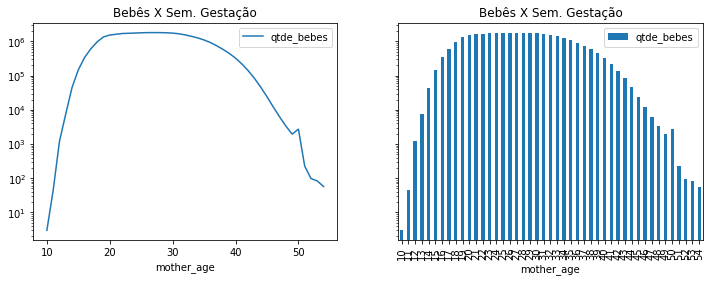

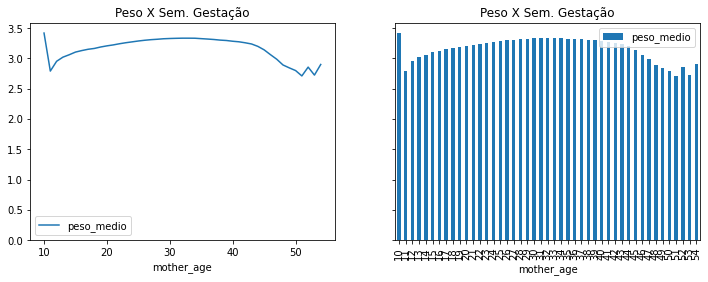

In [13]:
# Bar plot to see gestation_weeks with avg_wt linear and num_babies logarithmic
df = get_grouped_values('mother_age')
df = df.sort_values('mother_age')
display(df.transpose())
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
df.plot(x='mother_age', y='qtde_bebes', ax=ax1, logy=True, title="Bebês X Sem. Gestação");
df.plot(x='mother_age', y='qtde_bebes', ax=ax2, logy=True, kind='bar', title="Bebês X Sem. Gestação");
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
df.plot(x='mother_age', y='peso_medio', ax=ax1, title="Peso X Sem. Gestação");
df.plot(x='mother_age', y='peso_medio', ax=ax2, kind='bar', title="Peso X Sem. Gestação");
plt.show()

# Conclusão

Informe aqui as hipóteses obtidas com base na EDA:

(Escreva sua conclusão aqui!)

 



No próximo notebook, desenvolveremos um modelo de aprendizado de máquina para combinar todos esses fatores para obter uma previsão do peso de um bebê.